## Pytorch Activation Function 激活函数

* Relu

* Sigmoid

* Tanh

* softplus

* softmax

In [ ]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [ ]:
# fake data
x = torch.linspace(-5, 5, 200)   # 使用torch生成500个等差数据
x = Variable(x)
x_np = x.data.numpy()            # 转换成 np 类型

data = {
    'relu': F.relu(x).data.numpy(),
    'sigmoid': torch.sigmoid(x).data.numpy(),
    'tanh': torch.tanh(x).data.numpy(),
    'softplus': F.softplus(x).data.numpy(),
    'softmax': F.softmax(x).data.numpy()
}

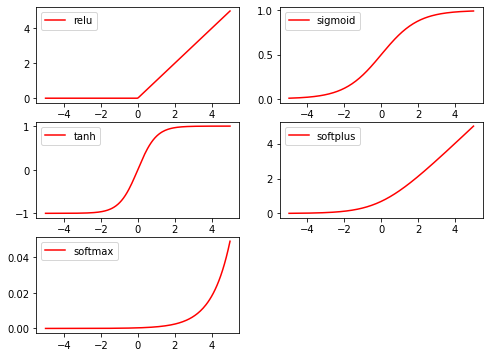

In [12]:
keys = list(data.keys())
plt.figure(1, figsize=(8, 6))    # 分别绘制折线图
nrow = len(keys) // 2 + len(keys) % 2
for i,key in enumerate(keys):
    plt.subplot(nrow,2, i+1)
    plt.plot(x_np, data[key], c='red', label=key)
    # plt.ylim((-1, 5))
    plt.legend(loc='best')
plt.show()


### 分类问题

|分类问题名称	|输出层使用激活函数	|对应的损失函数|
|:----|:----|:----|
|二分类	|sigmoid函数	|二分类交叉熵损失函数BCELoss()--不带sigmoid
、BCEWithLogitsLoss()--带sigmoid|
|多分类	|softmax函数|	多类别交叉熵损失函数nn.NLLLoss()--不带LogSoftmax、
nn.CrossEntropy()--带LogSoftmax|
|多标签分类	|sigmoid函数	|二分类交叉熵损失函数
BCELoss()、BCEWithLogitsLoss()MultiLabelSoftMarginLoss()|


https://zhuanlan.zhihu.com/p/372628727

In [14]:
import torch
import torch.nn as nn

model = nn.Linear(10, 1)
criterion = nn.BCEWithLogitsLoss()

x = torch.randn(16, 10)
y = torch.empty(16).random_(2)  # (16, )
print(x)
print(y)

tensor([[ 0.5545, -0.9585, -0.3273, -0.9355,  0.3033,  0.2809,  0.7884, -0.0440,
          0.6760, -1.7179],
        [-1.3398, -0.4131,  0.6856, -0.3410,  1.5637, -0.4730, -0.7981, -0.9067,
         -0.5728, -0.6046],
        [ 0.0170,  1.2865, -0.3690, -1.3579,  0.1657, -1.6883, -1.1429,  1.1850,
         -0.5963, -0.7445],
        [ 0.5207, -0.2618,  1.5272,  1.0998,  0.6311, -0.9665,  1.5180, -0.4584,
         -0.8177,  0.0052],
        [ 0.0336,  0.1819, -0.0642,  0.3756,  0.3783, -1.0178, -0.2458,  0.4910,
          0.5886,  0.4864],
        [ 0.1567, -0.0893,  0.5134,  0.0071, -0.6209, -0.3195, -0.7615, -1.5025,
         -0.8795,  0.7883],
        [-0.4469,  1.0083, -0.6687, -0.1454,  1.0557, -0.5521, -0.5653, -0.2942,
         -2.0837,  0.1605],
        [-0.2825, -1.0446,  0.1335,  1.2140, -0.7499,  0.3480, -0.3219,  0.4035,
          0.9318, -1.3087],
        [-0.5086, -0.5511,  0.2268, -2.2035,  1.3395,  0.0338,  1.0602,  0.1568,
         -0.1141,  0.2027],
        [ 0.4010, -

In [16]:
out = model(x)  # (16, 1)
out = out.squeeze(dim=-1)  # (16, )

loss = criterion(out, y)
print(out)
print(loss)


tensor([ 0.4870,  0.8617, -1.0304,  1.6087, -0.2026,  0.4560,  0.3682,  0.0670,
         0.7918,  1.1718, -0.3665,  0.2518,  0.5479,  1.2066, -0.0497, -0.0556],
       grad_fn=<SqueezeBackward1>)
tensor(0.7871, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
